In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm # statiscs module for time serie s analysis

from datetime import datetime, timedelta
import time
import matplotlib.dates as mdates

# plotting modules
import seaborn as sns
import os
from IPython.display import Image

%matplotlib inline

# Data loading

<div class="alert alert-success">
    <b>EXERCISE</b>: read in the data/FlowData.csv in an appropriate form (check the file format)
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: make the index a datetime index
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: isolate the L06_347 station and plot it for the month of Feb 212
</div>

In [62]:
# tip df['2012...']

# Forecast fft

adjusted from https://gist.github.com/tartakynov/83f3cd8f44208a1856ce

In [83]:
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 1000                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return( restored_sig + p[0] * t)
    
def main(x, n_predict):
    ''' n_predict = number of data points to predict (int)'''
    extrapolation = fourierExtrapolation(x, n_predict)
    pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
    pl.legend()
    pl.show()
    return(extrapolation)
    
#     return(extrapolation)

<div class="alert alert-success">
    <b>EXERCISE</b>: look for correlations with other variables using a scatterplot.
    
    tip: you might want to use from pandas.plotting import scatter_matrix
</div>

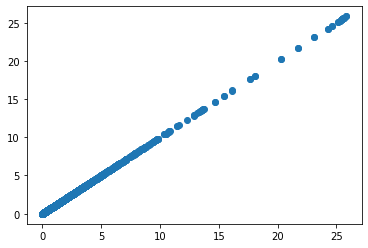

In [63]:
plt.scatter(df.resample('H').mean(), df.resample('H').mean(), sub)

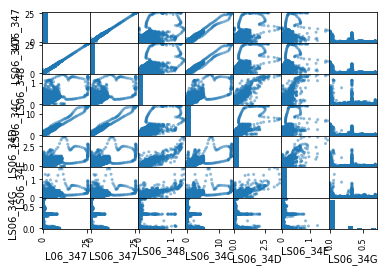

In [66]:
scatter_matrix(df);

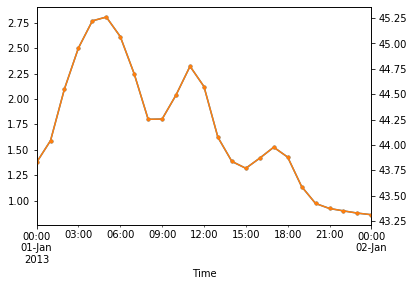

In [32]:
df['2013']['L06_347'].resample('H').mean().plot(marker='.')
sum(df['2013']['L06_347'].resample('H').mean(), df['2013']['L06_347'].resample('H').mean()).plot(marker='.', secondary_y=True)
# .plot(marker='.', secondary_y=True)

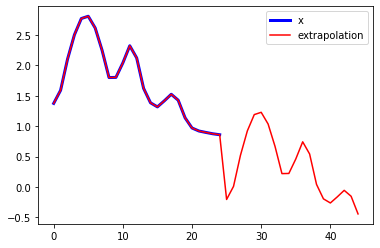

In [42]:
extap = main(df['2013']['L06_347'].resample('H').mean(), n_predict=20)

<div class="alert alert-success">
    <b>EXERCISE</b>: modify the **main** function so that the number of harmonics is an input variable
</div>

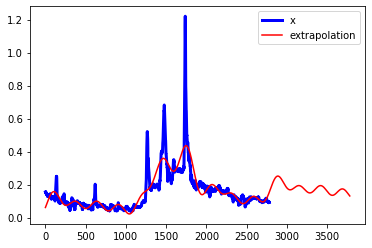

array([0.06096669, 0.06227651, 0.06359207, ..., 0.1320222 , 0.13143385,
       0.13085231])

In [82]:
main(df['2012-02']['L06_347'], n_predict=1000, n_harm=10)